In [4]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [5]:
data = widget.data_as_pandas

In [6]:
data

,x,y,color,label,batch
0,46.199437,103.057521,#1f77b4,a,1
1,46.839329,136.896158,#1f77b4,a,1
2,47.787217,141.342955,#1f77b4,a,1
3,52.536453,157.359868,#1f77b4,a,1
4,44.440502,178.639253,#1f77b4,a,1
...,...,...,...,...,...
679,702.888316,87.834537,#1f77b4,a,1
680,704.072533,93.141254,#1f77b4,a,1
681,702.518847,95.367118,#1f77b4,a,1
682,708.277172,89.303633,#1f77b4,a,1


In [7]:
data.to_csv("../data/simple.csv", index=False)

<AxesSubplot:xlabel='x', ylabel='y'>

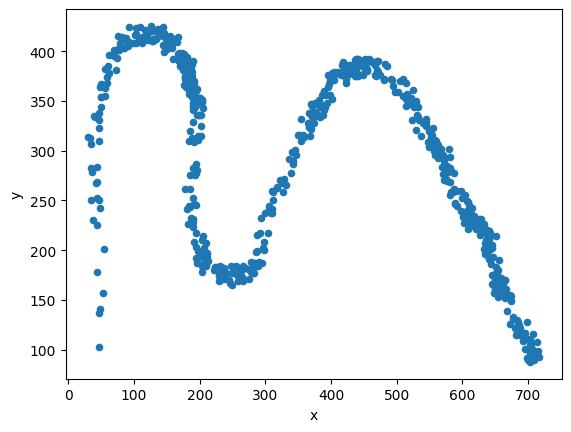

In [8]:
data.plot.scatter(x = 'x', y='y')

**Bagging:**

make 6 different random forests with a single tree using different seed

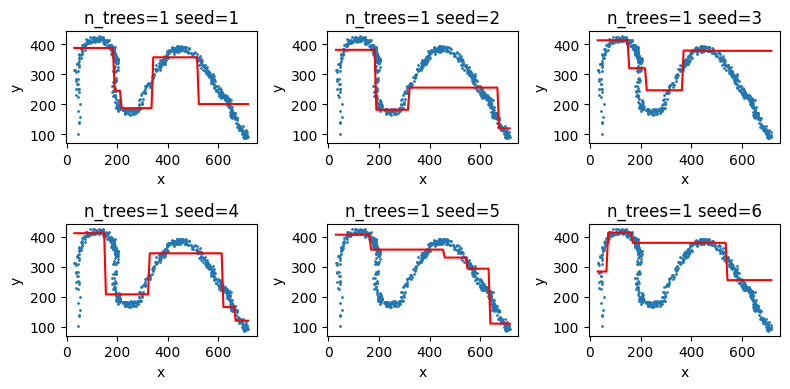

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

layouts = '''
123
456
'''
fig, axs = plt.subplot_mosaic(layouts, figsize=(8, 4))

n_trees = [1]*6
data = pd.read_csv('../data/simple.csv')
for i, n_tree in enumerate(n_trees, start=1):
    ax = axs[str(i)]
    data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree} seed={i}', s=1)
    # change random_state to get different trees
    clf = RandomForestRegressor(n_estimators=n_tree, max_depth=3, max_samples=.01, random_state=i)
    clf.fit(data[['x']], data['y'])
    x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})
    y = clf.predict(x)
    # print(np.array(x).shape, np.array(y).shape)
    ax.plot(np.array(x), np.array(y), c='red')

fig.tight_layout()

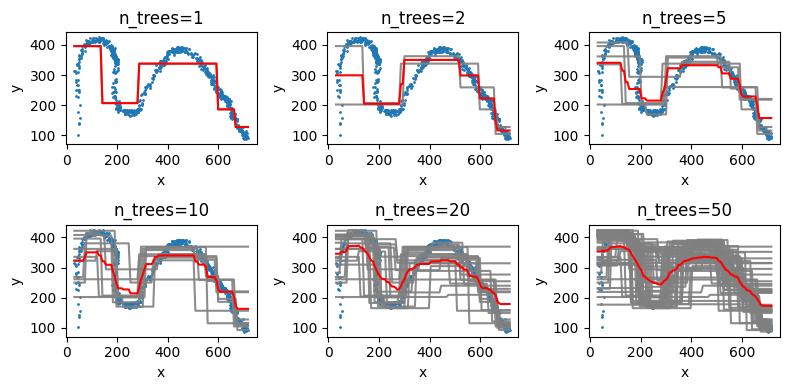

In [11]:
# illustrate random forest v. single tree
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

layouts = '''
123
456
'''
fig, axs = plt.subplot_mosaic(layouts, figsize=(8, 4))

n_trees = [1, 2, 5, 10, 20 , 50]
data = pd.read_csv('../data/simple.csv')
for i, n_tree in enumerate(n_trees, start=1):
    ax = axs[str(i)]
    data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree}', s=1)
    # play with max_depth and max_samples to see how they affect the trees
    rf = RandomForestRegressor(n_estimators=n_tree, max_depth=3, max_samples=.01, random_state=42)
    rf.fit(data[['x']], data['y'])
    x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})

    # loop over trees and plot them
    for i, tree in enumerate(rf.estimators_):
        y = tree.predict(x)
        ax.plot(np.array(x), np.array(y), c='grey', alpha=.9)
    y = rf.predict(x)
    ax.plot(np.array(x), np.array(y), c='red')

fig.tight_layout()

In [13]:
from ipywidgets import interact, IntSlider, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# hide warnings
import warnings
warnings.filterwarnings('ignore')


def plot_random_forest(data_path, max_depth, max_samples):
  """
  Plots random forest predictions for different numbers of trees.

  Args:
      data_path (str): Path to the CSV file containing data.
      max_depth (int): Maximum depth of the trees.
      max_samples (float): Proportion of samples to draw for each tree.
  """
  layouts = '''
  123456
  '''
  plt.close('all')
  fig, axs = plt.subplot_mosaic(layouts, figsize=(18, 4))
  n_trees = [1, 2, 5, 10, 20, 50]
  data = pd.read_csv(data_path)
  for i, n_tree in enumerate(n_trees, start=1):
      ax = axs[str(i)]
      data.plot.scatter(x='x', y='y', ax=ax, title=f'n_trees={n_tree}', s=1)

      rf = RandomForestRegressor(n_estimators=n_tree, 
                                 max_depth=max_depth, 
                                 max_samples=max_samples, 
                                 random_state=42)
      rf.fit(data[['x']], data['y'])
      x = pd.DataFrame({'x': np.linspace(data.x.min(), data.x.max(), 100)})

      # loop over trees and plot them
      for i, tree in enumerate(rf.estimators_):
          y = tree.predict(x)
          ax.plot(np.array(x), np.array(y), c='grey', alpha=.9)
      y = rf.predict(x)
      ax.plot(np.array(x), np.array(y), c='red')
  plt.show()


# Define sliders
max_depth_slider = IntSlider(min=1, max=10, value=3, description="Max Depth")
max_samples_slider = FloatSlider(min=0.01, max=1.0, step=0.01, value=0.1, description="Max Samples")

# Update the plot whenever the slider values change
interact(plot_random_forest, 
         data_path="../data/simple.csv", 
         max_depth=max_depth_slider, 
         max_samples=max_samples_slider)

interactive(children=(Text(value='../data/simple.csv', description='data_path'), IntSlider(value=3, descriptio…

<function __main__.plot_random_forest(data_path, max_depth, max_samples)>

**Random Forest Example:**
- A random forest is a popular ensemble method that utilizes bagging. It builds a multitude of decision trees at training time and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It is known for its robustness and ease of use without extensive hyperparameter tuning. 

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import set_config

set_config(transform_output='pandas')

In [15]:
# Load the dataset
adult_data = fetch_openml(data_id=1590)  # Adult census income dataset
X = adult_data.data
y = adult_data.target

In [17]:
# create local parquet file
(X
 .assign(y=y)
 .to_parquet('../data/adult.parquet')
)

In [19]:
adult = pd.read_parquet('../data/adult.parquet')
X = (adult.drop(columns='y'))
y = adult.y
     

In [20]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [21]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: y, Length: 48842, dtype: category
Categories (2, object): ['<=50K', '>50K']

In [23]:
# check for missing values:
X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [24]:
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categorical_features = X.select_dtypes(include=['category']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [27]:
# only encode the categorical features
categorical_transformer.fit_transform(X[categorical_features])

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_missing,education_10th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_missing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
# try just a decision tree:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# pipeline with decision tree
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.818


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# pipeline with random forest
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.826


<AxesSubplot:title={'center':'Random Forest Classifier Accuracy vs Number of Trees'}, xlabel='n_estimators', ylabel='Accuracy'>

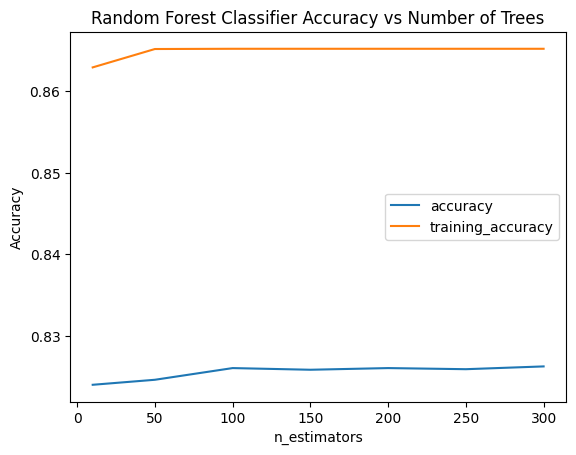

In [30]:
# tune number of trees
import pandas as pd

scores = []
training_scores = []
n_estimators = [10, 50, 100, 150, 200, 250, 300]
for n in n_estimators:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=n, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy) 
    training_predictions = pipeline.predict(X_train)
    training_accuracy = accuracy_score(y_train, training_predictions)
    training_scores.append(training_accuracy)

(pd.DataFrame({'n_estimators': n_estimators, 'accuracy': scores, 'training_accuracy': training_scores})
 .set_index('n_estimators')
    .plot(title='Random Forest Classifier Accuracy vs Number of Trees', ylabel='Accuracy'))

**Challenge: Tune Random Forest Parameters:**
- Task: Improve the model accuracy by tuning the max_depth parameter.

In [32]:
n_estimators

[10, 50, 100, 150, 200, 250, 300]

<AxesSubplot:title={'center':'Random Forest Classifier Accuracy vs Number of Trees'}, xlabel='n_estimators', ylabel='Accuracy'>

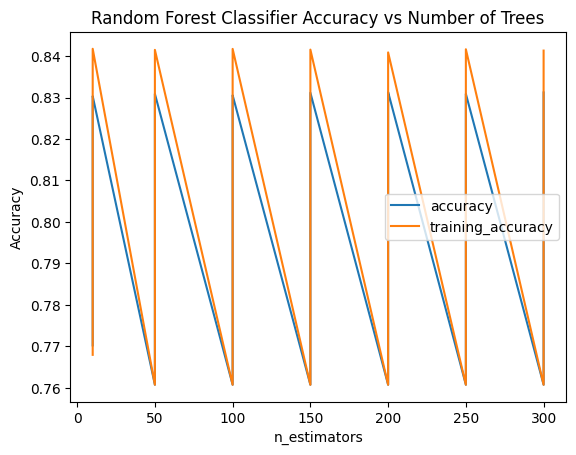

In [33]:
# tune number of trees
import pandas as pd

scores = []
n_estimators = []
depth = []
training_scores = []
n_est = [10, 50, 100, 150, 200, 250, 300]
max_depth = [2,4,6,8,10,12,14]
for n in n_est:
    for d in max_depth:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=n, random_state=42, max_depth=d))
        ])
        pipeline.fit(X_train, y_train)
        predictions = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy) 
        n_estimators.append(n)
        depth.append(d)
        training_predictions = pipeline.predict(X_train)
        training_accuracy = accuracy_score(y_train, training_predictions)
        training_scores.append(training_accuracy)

(pd.DataFrame({'n_estimators': n_estimators, 'accuracy': scores, 'training_accuracy': training_scores})
 .set_index('n_estimators')
    .plot(title='Random Forest Classifier Accuracy vs Number of Trees', ylabel='Accuracy'))

<AxesSubplot:title={'center':'Random Forest Classifier Accuracy vs Number of Trees'}, xlabel='depth', ylabel='Accuracy'>

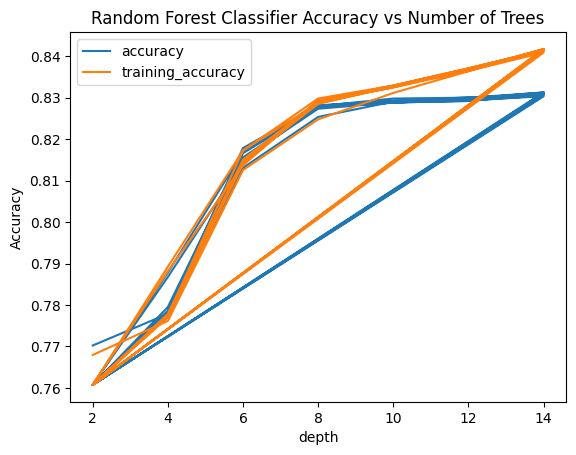

In [35]:
(pd.DataFrame({'depth': depth, 'accuracy': scores, 'training_accuracy': training_scores})
 .set_index('depth')
    .plot(title='Random Forest Classifier Accuracy vs Number of Trees', ylabel='Accuracy'))